In [1]:
import pandas as pd
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)
tf.config.experimental.set_memory_growth(gpu[1], True)
if gpu:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpu[0], 'GPU')
    except RuntimeError as e:
    # Visible devices must be set at program startup
        print(e)

In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
df_cassava = pd.read_csv('train.csv')
df_cassava.head(15)

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
5,1000837476.jpg,3
6,1000910826.jpg,2
7,1001320321.jpg,0
8,1001723730.jpg,4
9,1001742395.jpg,3


In [4]:
df_cassava["label"].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [5]:
drop_cat_3 = df_cassava['image_id'][df_cassava['label'] == 3].sample(11000).index.to_list()

In [6]:
df_cassava = df_cassava.drop(drop_cat_3)

In [7]:
df_cassava.reset_index(inplace=True)
df_cassava["label"].value_counts()

4    2577
2    2386
1    2189
3    2158
0    1087
Name: label, dtype: int64

In [8]:
directory = 'train_images/'

In [9]:
df_cassava.drop(['index'],axis=1,inplace=True)

In [10]:
df_cassava["path"] = df_cassava['image_id'].map(lambda x :directory + x)
df_cassava.head(5)

,image_id,label,path
0,1000015157.jpg,0,train_images/1000015157.jpg
1,100042118.jpg,1,train_images/100042118.jpg
2,1000723321.jpg,1,train_images/1000723321.jpg
3,1000910826.jpg,2,train_images/1000910826.jpg
4,1001320321.jpg,0,train_images/1001320321.jpg


In [11]:
from sklearn.utils import resample

In [12]:
df_0 = df_cassava[df_cassava['label'] == 0]
df_1 = df_cassava[df_cassava['label'] == 1]
df_2 = df_cassava[df_cassava['label'] == 2]
df_3 = df_cassava[df_cassava['label'] == 3]
df_4 = df_cassava[df_cassava['label'] == 4]


In [13]:
n_samples = 1000
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)

In [14]:
df_cassava_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced])
df_cassava_balanced.head(15)

,image_id,label,path
8147,4005310479.jpg,0,train_images/4005310479.jpg
9971,830574932.jpg,0,train_images/830574932.jpg
1315,1474472052.jpg,0,train_images/1474472052.jpg
4635,2683970067.jpg,0,train_images/2683970067.jpg
3450,2264163141.jpg,0,train_images/2264163141.jpg
930,1339257499.jpg,0,train_images/1339257499.jpg
8281,4059009090.jpg,0,train_images/4059009090.jpg
1417,1510579448.jpg,0,train_images/1510579448.jpg
7412,3731008076.jpg,0,train_images/3731008076.jpg
3596,2318255553.jpg,0,train_images/2318255553.jpg


In [15]:
df_cassava_balanced = df_cassava_balanced.sample(frac=1).reset_index(drop=True)

In [16]:
df_cassava_balanced.head(5)

,image_id,label,path
0,1797152583.jpg,2,train_images/1797152583.jpg
1,3955442838.jpg,0,train_images/3955442838.jpg
2,3558035737.jpg,1,train_images/3558035737.jpg
3,1036959902.jpg,0,train_images/1036959902.jpg
4,2719114674.jpg,1,train_images/2719114674.jpg


In [17]:
df_cassava_balanced['label'].value_counts()

3    1000
2    1000
1    1000
4    1000
0    1000
Name: label, dtype: int64

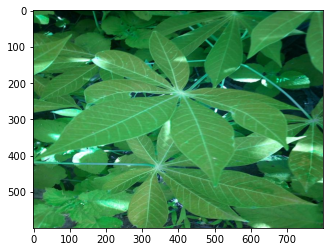

In [18]:
plt.imshow(cv.imread(df_cassava['path'][1]))

In [19]:
diseases = {
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}
groups = [0,1,2,3,4]

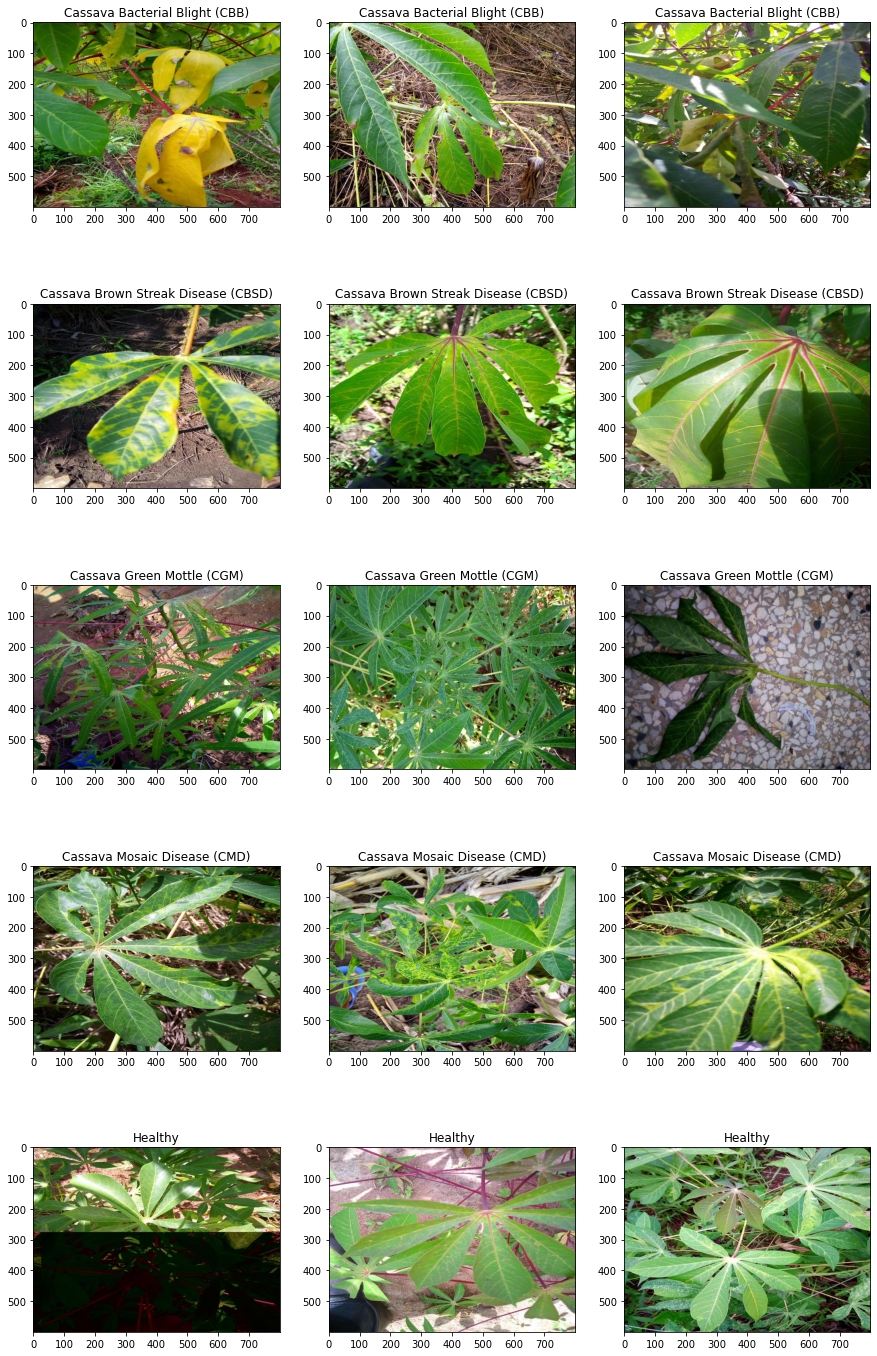

In [20]:
fig, ax = plt.subplots(nrows= 5, ncols=3, figsize =(15,25))
## label 
for axi, i in zip(ax.flat, sorted(3*groups) ) :
    axi.imshow(Image.open(df_cassava['path'][df_cassava['label'] == i].sample(1).values[0]))
    axi.set_title(diseases[str(i)])

In [21]:
SIZE = (512,512)

In [22]:
#df_cassava['image'] = df_cassava['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [23]:
# contrast equalization with clahe
clahe = cv.createCLAHE(clipLimit=3., tileGridSize=(8,8))


In [24]:
def preprocess_images(path):
    img = cv.imread(path)
    img = cv.resize(img,SIZE)
    #img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
    #l, a, b = cv.split(lab)
    #l2 = clahe.apply(l)
    #lab = cv.merge((l2,a,b))
    #img = cv.cvtColor(lab, cv.COLOR_LAB2RGB)
    img = cv.cvtColor(img, cv.COLOR_RGB2LAB)
    return img

In [25]:
#df_cassava['image'] = df_cassava['path'].apply(preprocess_images)
df_cassava_balanced['image'] = df_cassava_balanced['path'].apply(preprocess_images)

In [26]:
df_cassava_balanced.head(5)

,image_id,label,path,image
0,1797152583.jpg,2,train_images/1797152583.jpg,"[[[153, 124, 125], [134, 123, 125], [135, 118,..."
1,3955442838.jpg,0,train_images/3955442838.jpg,"[[[160, 110, 127], [158, 108, 127], [148, 107,..."
2,3558035737.jpg,1,train_images/3558035737.jpg,"[[[203, 91, 134], [196, 94, 133], [196, 97, 13..."
3,1036959902.jpg,0,train_images/1036959902.jpg,"[[[170, 124, 132], [170, 123, 133], [166, 120,..."
4,2719114674.jpg,1,train_images/2719114674.jpg,"[[[163, 129, 129], [163, 129, 129], [163, 129,..."


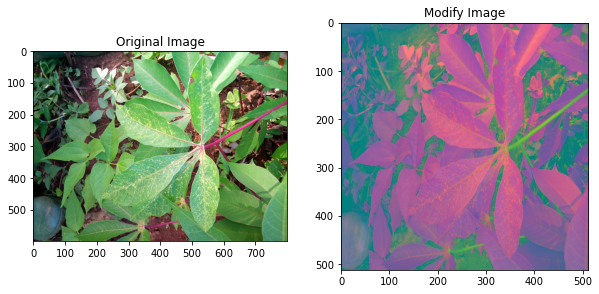

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(Image.open(df_cassava_balanced['path'][11]))
plt.subplot(222)
plt.title('Modify Image')
plt.imshow(df_cassava_balanced['image'][11])
plt.show()

In [28]:
df_cassava.head(5)

,image_id,label,path
0,1000015157.jpg,0,train_images/1000015157.jpg
1,100042118.jpg,1,train_images/100042118.jpg
2,1000723321.jpg,1,train_images/1000723321.jpg
3,1000910826.jpg,2,train_images/1000910826.jpg
4,1001320321.jpg,0,train_images/1001320321.jpg


In [29]:
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split


In [30]:
#Manualy standardition of data for preserve memory
def std(image):
    std = (image-image.mean())/image.std()
    return std

In [31]:
#df_cassava_balanced['image'] = df_cassava_balanced['image'].apply(std)

In [32]:
df_cassava_balanced.head(5)

,image_id,label,path,image
0,1797152583.jpg,2,train_images/1797152583.jpg,"[[[153, 124, 125], [134, 123, 125], [135, 118,..."
1,3955442838.jpg,0,train_images/3955442838.jpg,"[[[160, 110, 127], [158, 108, 127], [148, 107,..."
2,3558035737.jpg,1,train_images/3558035737.jpg,"[[[203, 91, 134], [196, 94, 133], [196, 97, 13..."
3,1036959902.jpg,0,train_images/1036959902.jpg,"[[[170, 124, 132], [170, 123, 133], [166, 120,..."
4,2719114674.jpg,1,train_images/2719114674.jpg,"[[[163, 129, 129], [163, 129, 129], [163, 129,..."


In [33]:
X = np.asarray(df_cassava_balanced['image'].tolist()).astype(np.float16)
X = X/255.
Y = df_cassava_balanced['label']
#Y_cat = to_categorical(Y, num_classes=5)
#x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.20, random_state=42, stratify=Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [34]:
#from sklearn.utils import class_weight

In [35]:
#class_weights_values = class_weight.compute_class_weight('balanced',
#                                                 np.unique(y_train),
#                                                 y_train)

In [36]:
#num_labels = 5
#class_weight = {np.unique(y_train)[i]: class_weights_values[i] for i in range(num_labels) }

In [37]:
train_tensor = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_tensor = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [38]:
train_tensor = train_tensor.shuffle(len(train_tensor)).batch(2)
val_tensor = val_tensor.batch(2)

In [39]:
for images,label in train_tensor.take(1):
    print(images.shape)
    print(label.shape)

(2, 512, 512, 3)
(2,)


In [40]:
for images,label in val_tensor.take(1):
    print(images.shape)
    print(label.shape)

(2, 512, 512, 3)
(2,)


In [41]:
def build_model():

    input_tensor = tf.keras.Input(shape=(*SIZE,3))
    
      
    Xception = tf.keras.applications.Xception(input_shape=(*SIZE,3),include_top=False, input_tensor=input_tensor)
    Xception.trainable = True
    
    
    
    top_model = tf.keras.Sequential()
    #top_model.add(tf.keras.layers.GlobalAveragePooling2D())
    top_model.add(tf.keras.layers.GlobalMaxPooling2D())
    top_model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    top_model.add(tf.keras.layers.Dropout(0.3))
    top_model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    top_model.add(tf.keras.layers.Dropout(0.1))
    top_model.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

    model = tf.keras.Model(inputs=Xception.input, outputs=top_model(Xception.output))
    
           
    return model

In [42]:
model = build_model()
#model.summary()

In [43]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #featurewise_center=True, 
    #samplewise_center=True,
    #featurewise_std_normalization=True,
    #samplewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [44]:
initial_learning_rate = 0.00005
                        
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True
    )

optimizer = tf.keras.optimizers.Adam(lr_schedule)


model.compile(
        optimizer = optimizer,
        loss= tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics = tf.keras.metrics.SparseCategoricalAccuracy()
            )

In [ ]:
epochs = 30
#history = model.fit(x=train_tensor, validation_data=val_tensor,epochs=epochs)#,class_weight=class_weight)
history = model.fit(datagen.flow(x_train, y_train,batch_size=2,shuffle=True), 
                    validation_data=val_tensor,
                    epochs=epochs)#, class_weight=class_weight)

Epoch 1/30
2000/2000 [==============================] - 322s 153ms/step - loss: 1.6220 - sparse_categorical_accuracy: 0.2759 - val_loss: 1.1315 - val_sparse_categorical_accuracy: 0.5570
Epoch 2/30
2000/2000 [==============================] - 303s 151ms/step - loss: 1.1413 - sparse_categorical_accuracy: 0.5534 - val_loss: 0.8742 - val_sparse_categorical_accuracy: 0.6870
Epoch 3/30
2000/2000 [==============================] - 310s 155ms/step - loss: 0.9217 - sparse_categorical_accuracy: 0.6579 - val_loss: 0.7837 - val_sparse_categorical_accuracy: 0.7100
Epoch 4/30
2000/2000 [==============================] - 335s 167ms/step - loss: 0.8078 - sparse_categorical_accuracy: 0.7150 - val_loss: 0.7384 - val_sparse_categorical_accuracy: 0.7240
Epoch 5/30
2000/2000 [==============================] - 328s 164ms/step - loss: 0.7118 - sparse_categorical_accuracy: 0.7403 - val_loss: 0.7068 - val_sparse_categorical_accuracy: 0.7400
Epoch 6/30
2000/2000 [==============================] - 335s 168ms/ste

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])